# 1 . Authenticate to Twitter

In [1]:
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
%store -r bearer_token
#initialize client
client = tw.Client(bearer_token=bearer_token)

# 2. Get Tweets
- Collect the sentiment(tweets) of each day fro the past seven days at 2400
- Collect the varying sentiment over a day at 4 ifeent times of day

0600,1200,1800,2400

In [3]:
import datetime

# get current time and start time (14 days ago)
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
start_time = yesterday.replace(hour=20,minute=0, second=0, microsecond=0)


# format start time string for Twitter API
start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")


In [4]:

#Create a query
query = '#BTC #bitcoin -is:retweet -eth -ETH -#ETH'


#Send the request through the client method
response = (tw.Paginator(client.search_recent_tweets,query=query,end_time = start_time  ,
                              tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=150))



In [5]:
#Unpack the api response into a dictionary
tweets= [{'Tweets':tweet.text,'Timestamp':tweet.created_at} for tweet in response]

Im trying to make the call 7 times with diferent end time each time
- Trouble unpacking the gen obj

# 3. Preprocess
- Clean the tweets
- Lematize words

Lematize is reducing a word to base form. Walks walking walked get turned to Walk. Making it easier to analyze

In [6]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweets,Timestamp
0,"1- #Bitcoin : Önceki iki ay; bankalar battı, B...",2023-05-15 19:59:59+00:00
1,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 19:59:27+00:00
2,The #cryptocurrency conspiracy. A MUST WATCH a...,2023-05-15 19:59:16+00:00
3,"The number of 'Wholecoiners,' or addresses hol...",2023-05-15 19:59:06+00:00
4,#DEX @TransitFinance ve #Nervos ekosisteminin ...,2023-05-15 19:58:37+00:00


In [7]:
df.shape

(150, 2)

In [8]:
#import libs
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

In [9]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = [stopwords.words('english')]
custom_stopwords = ['#','RT','crypto']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\w126311\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\w126311\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\w126311\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweets'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweets,Timestamp,Processed Tweet
0,"1- #Bitcoin : Önceki iki ay; bankalar battı, B...",2023-05-15 19:59:59+00:00,"1- #Bitcoin : Önceki iki ay; bankalar battı, B..."
1,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 19:59:27+00:00,HI I'm an AI bot I will show my result for inf...
2,The #cryptocurrency conspiracy. A MUST WATCH a...,2023-05-15 19:59:16+00:00,The #cryptocurrency conspiracy. A MUST WATCH a...
3,"The number of 'Wholecoiners,' or addresses hol...",2023-05-15 19:59:06+00:00,"The number of 'Wholecoiners,' or address holdi..."
4,#DEX @TransitFinance ve #Nervos ekosisteminin ...,2023-05-15 19:58:37+00:00,#DEX @TransitFinance ve #Nervos ekosisteminin ...


# 4. Calculate Sentiment
- Get Polarity and Subjectivity

**Polarity** : Negative or Positive

**Subjectivity**: How much based on emotion is the tweet

In [11]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [12]:
df.head()

,Tweets,Timestamp,Processed Tweet,polarity,subjectivity
0,"1- #Bitcoin : Önceki iki ay; bankalar battı, B...",2023-05-15 19:59:59+00:00,"1- #Bitcoin : Önceki iki ay; bankalar battı, B...",0.000000,0.000000
1,HI I'm an AI bot I will show my result\nfor in...,2023-05-15 19:59:27+00:00,HI I'm an AI bot I will show my result for inf...,0.000000,0.000000
2,The #cryptocurrency conspiracy. A MUST WATCH a...,2023-05-15 19:59:16+00:00,The #cryptocurrency conspiracy. A MUST WATCH a...,0.418182,0.527273
3,"The number of 'Wholecoiners,' or addresses hol...",2023-05-15 19:59:06+00:00,"The number of 'Wholecoiners,' or address holdi...",0.100000,0.450000
4,#DEX @TransitFinance ve #Nervos ekosisteminin ...,2023-05-15 19:58:37+00:00,#DEX @TransitFinance ve #Nervos ekosisteminin ...,0.000000,0.000000


In [13]:
df.shape

(150, 5)

In [14]:
df.describe()

,polarity,subjectivity
count,150.000000,150.000000
mean,0.039207,0.177885
std,0.170935,0.253836
min,-0.600000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.025000,0.393750
max,1.000000,1.000000


# 5. Vizualize

In [15]:
#make a moving average for sentiment

btc = df[['Timestamp', 'polarity']]
btc = btc.sort_values(by='Timestamp', ascending=True)
btc['MA Polarity'] = btc.polarity.rolling(10, min_periods=3).mean()

In [16]:
btc.head()

,Timestamp,polarity,MA Polarity
149,2023-05-15 19:32:23+00:00,-0.181818,NaN
148,2023-05-15 19:32:34+00:00,0.000000,NaN
147,2023-05-15 19:32:34+00:00,0.000000,-0.060606
146,2023-05-15 19:32:35+00:00,0.000000,-0.045455
145,2023-05-15 19:32:43+00:00,-0.008333,-0.038030


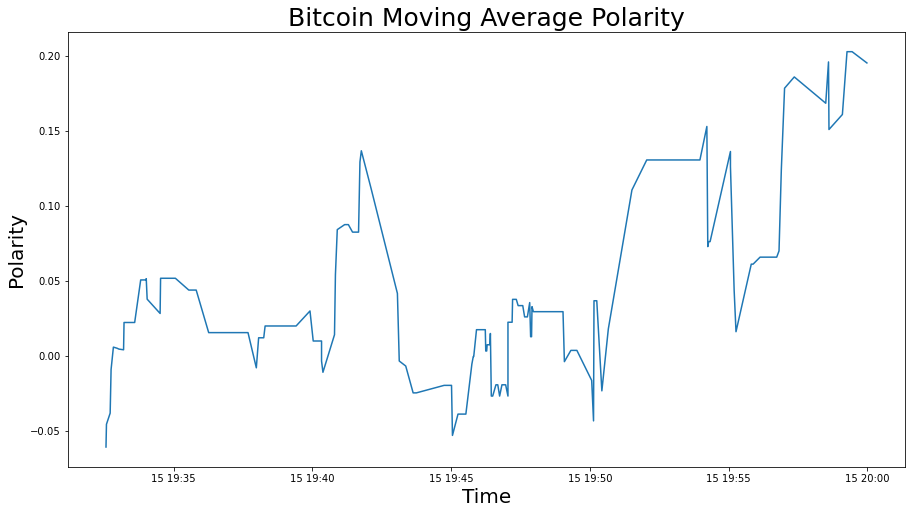

In [17]:
#plot the MA polarity
fig,ax = plt.subplots(figsize=(15,8))
ax.plot(btc['Timestamp'],btc['MA Polarity'])
ax.set_title('Bitcoin Moving Average Polarity',fontsize = 25);
ax.set_ylabel('Polarity',fontsize = 20);
ax.set_xlabel('Time',fontsize = 20);

# 6. Compare With BTC price
- Collect BTC price data
- Make sure the data is from the same time period as the tweets

In [18]:
#Get the tweets time range
start_range = df['Timestamp'].iloc[-1].round('min')
end_range = df['Timestamp'][0].round('min')

# Format the timestamp
formatted_start_range = start_range.strftime("%Y-%m-%d %H:%M:%S")
formatted_end_range = end_range.strftime("%Y-%m-%d %H:%M:%S")

#Set the API hours variable based on the tweets end_range
API_hours = end_range.round('H').hour+1

In [19]:
#Get the price data from API

import requests
import time

#get data from api

url = 'https://min-api.cryptocompare.com/data/v2/histominute'

start_time = yesterday.replace(hour=API_hours,minute=0, second=0, microsecond=0)

# set the parameters for the API request
params = {
    'fsym': 'BTC',
    'tsym': 'USD',
    'limit': 1400,  # number of minutes to retrieve
    'aggregate': 1,  # granularity of the data (1 = 1 minute)
    'toTs': int(time.mktime(start_time.timetuple()))
}

response = requests.get(url, params=params)
data = response.json()['Data']['Data']
df_price = pd.DataFrame(data = data)


df_price['time'] = pd.to_datetime(df_price['time'], unit='s')


In [20]:
#get the index in the price df of values we want
start_of_tweets = df_price['time'][df_price['time'] == formatted_start_range].index.item()
end_of_tweets = df_price['time'][df_price['time'] == formatted_end_range].index.item()


In [21]:
#Get a slice of the price df corresponding to the tweets time range
df_slice = df_price.iloc[start_of_tweets:end_of_tweets]
df_slice.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
1372,2023-05-15 19:32:00,27402.26,27386.48,27402.26,25.74,704901.79,27390.57,direct,
1373,2023-05-15 19:33:00,27394.13,27379.53,27390.57,24.74,677465.62,27380.80,direct,
1374,2023-05-15 19:34:00,27381.48,27372.34,27380.80,25.13,687884.88,27377.73,direct,
1375,2023-05-15 19:35:00,27390.66,27371.85,27377.73,56.51,1547275.23,27389.04,direct,
1376,2023-05-15 19:36:00,27415.87,27389.04,27389.04,55.23,1513369.44,27405.29,direct,


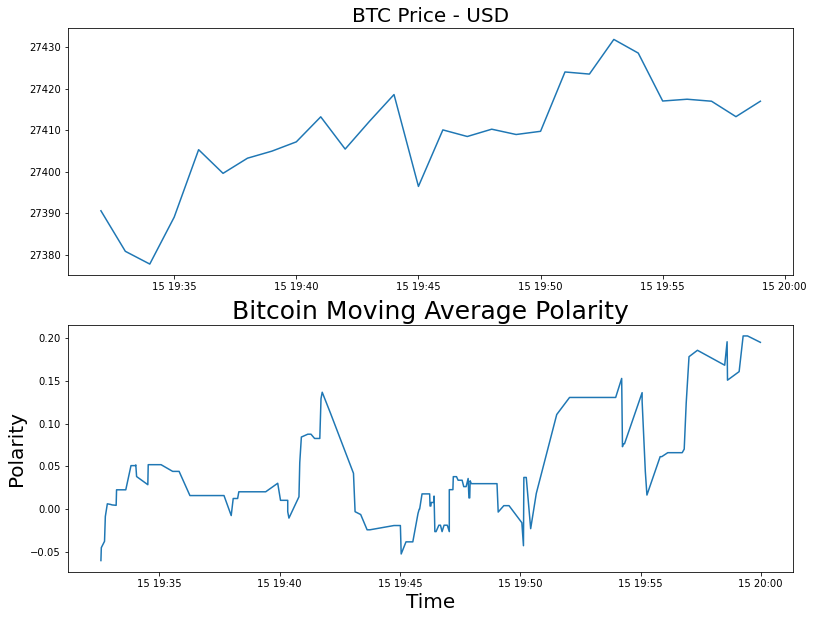

In [22]:
#Plot graph of 

fig,ax = plt.subplots(2,1,figsize=(13,10))

#plot price
ax[0].plot(df_slice['time'],df_slice['close']);
ax[0].set_title('BTC Price - USD',fontsize=20);

#plot sentiment
ax[1].plot(btc['Timestamp'],btc['MA Polarity'])
ax[1].set_title('Bitcoin Moving Average Polarity',fontsize = 25);
ax[1].set_ylabel('Polarity',fontsize = 20);
ax[1].set_xlabel('Time',fontsize = 20);